Import, inspect and transform data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Data/digit-recognizer/train.csv")

In [4]:
data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [5]:
data["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
data.astype('int8').dtypes

label       int8
pixel0      int8
pixel1      int8
pixel2      int8
pixel3      int8
            ... 
pixel779    int8
pixel780    int8
pixel781    int8
pixel782    int8
pixel783    int8
Length: 785, dtype: object

In [7]:
data.memory_usage() 

Index          128
label       336000
pixel0      336000
pixel1      336000
pixel2      336000
             ...  
pixel779    336000
pixel780    336000
pixel781    336000
pixel782    336000
pixel783    336000
Length: 786, dtype: int64

In [8]:
y = data["label"].astype("int8")
y = y.values
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int8)

In [10]:
X = data.drop(columns={"label"}).astype('int8')
X = X.values
X.shape
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [11]:
X_image = X[:100].reshape(100,28,28)
X_image.shape

(100, 28, 28)

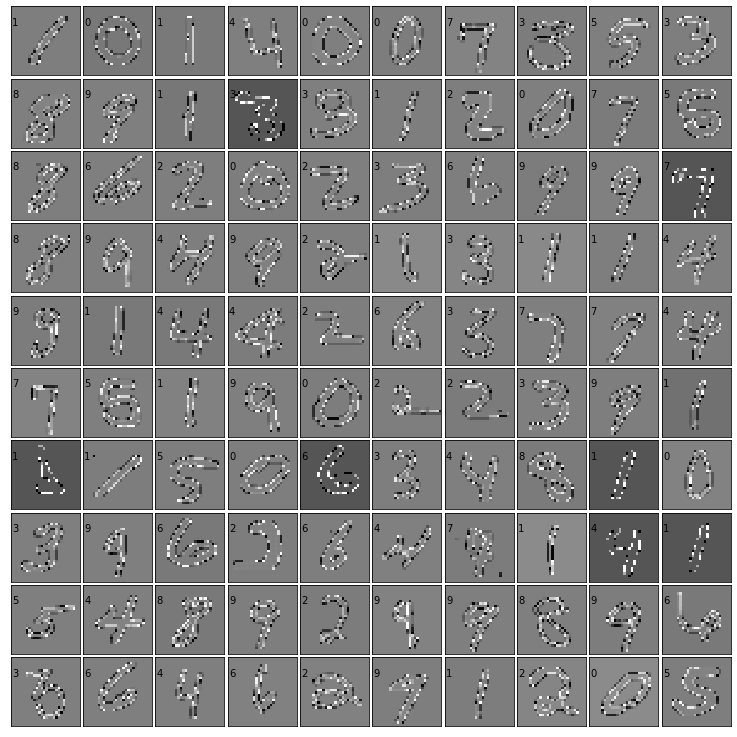

In [12]:
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_image[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y[i]))

Split data into test and train

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.75,
                                                    random_state=42,
                                                    stratify=y)

In [14]:
X_train.shape

(10500, 784)

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
classifier = LogisticRegressionCV(max_iter=5000)

In [83]:
classifier.fit(X_train, y_train)

C:\Users\jwr19\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [63]:
prediction = classifier.predict(X_test)

In [64]:
np.mean(prediction == y_test)

0.3396190476190476

In [65]:
classifier.score(X_test, y_test)

0.3396190476190476

In [66]:
classifier.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [72]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [73]:
classifier.n_iter_

array([2392])

In [76]:
classifier.coef_.shape

(10, 784)